## Understanding basics of PCA in Numpy

In [87]:
import numpy as np
from numpy.linalg import eig

In [90]:
# define a matrix
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)

[[1 2]
 [3 4]
 [5 6]]


In [93]:
# calculate the mean of each column
M = np.mean(A.T, axis=1)
print(M)

[3. 4.]


In [94]:
# center columns by subtracting column means
C = A - M
print(C.T)

[[-2.  0.  2.]
 [-2.  0.  2.]]


In [10]:
# calculate covariance matrix of centered matrix
V = np.cov(C.T)
print(V)

[[4. 4.]
 [4. 4.]]


In [11]:
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print(values)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[8. 0.]


In [14]:
# project data
P = vectors.T.dot(C.T)
print(P.T)

[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


In [95]:
# performing PCA using scikit learn package - Reusable PCA
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)

[[1 2]
 [3 4]
 [5 6]]


In [97]:
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(A)
# access values and vectors
print(pca.components_)
print(pca.explained_variance_)

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
[8.00000000e+00 2.25080839e-33]


In [18]:
# transform data
B = pca.transform(A)
print(B)

[[-2.82842712e+00  2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00 -2.22044605e-16]]


## Taking an example of random generated data

In [98]:
# Another example
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

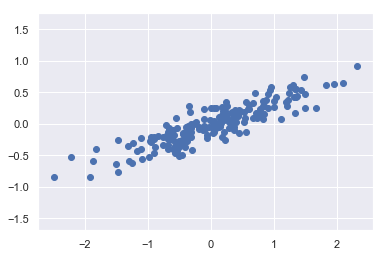

In [47]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [106]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [107]:
print(pca.explained_variance_)  

[0.7625315 0.0184779]


In [108]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


(-2.77152878069022, 2.661757596590677, -0.9964674432667127, 1.0219081775900811)

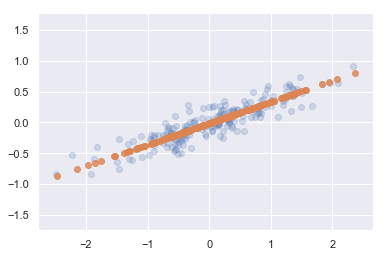

In [111]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

## Taking example from a random dataset

In [112]:
# Another example using digit recognition datasets
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [126]:
pca = PCA(27)  
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 27)


In [127]:
x = pca.explained_variance_.sum()

In [128]:
np.cumsum(pca.explained_variance_/x)

array([0.15761549, 0.30176886, 0.4266135 , 0.51563231, 0.57683861,
       0.62888363, 0.67456794, 0.71332321, 0.74881702, 0.78140588,
       0.80651688, 0.83057315, 0.8498574 , 0.86863348, 0.8841626 ,
       0.8990843 , 0.91304144, 0.92625286, 0.93702529, 0.94661115,
       0.95602678, 0.96446421, 0.9725879 , 0.98023966, 0.98760464,
       0.99391011, 1.        ])

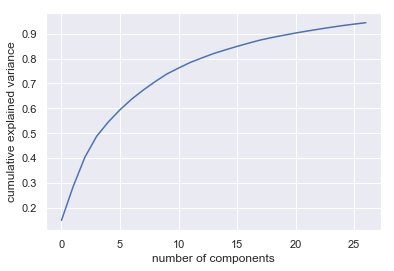

In [129]:
a = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');